## Tips Dataset Assignment

Welcome to the Tips Dataset assignment! In this assignment, you'll work with a dataset that captures information about restaurant bills and tips. Your goal is to explore and analyze this dataset using pandas and matplotlib.


### Import libraries and read dataset. If required connect to google drive.
5 points

In [10]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing tips data set
from google.colab import files

files.upload()
df = pd.read_csv('tips.csv')

Saving tips.csv to tips (4).csv


### Implement the five basic functions to get a sense of the dataset.
10 points

In [11]:
df.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [12]:
df.tail()

,total_bill,tip,smoker,day,time,size
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2
243,18.78,3.00,No,Thur,Dinner,2


In [13]:
df.sample(5)

,total_bill,tip,smoker,day,time,size
27,12.69,2.00,No,Sat,Dinner,2
135,8.51,1.25,No,Thur,Lunch,2
230,24.01,2.00,Yes,Sat,Dinner,4
114,25.71,4.00,No,Sun,Dinner,3
62,11.02,1.98,Yes,Sat,Dinner,2


In [45]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [15]:
df.shape

(244, 6)

### Section 1: Pandas
35 points

**Question 1**:
1. What is the average total bill amount for all records?
2. How many customers were smokers, and how many were non-smokers?

In [68]:
# 1. Finding the average total bill amouunt for all records
df['total_bill'].mean()

19.78594262295082

In [23]:
# 2. Finding the number of smokers and non-smokers

## Finding the number of unique values in `smoker` column to ensure there are no missed values
df['smoker'].unique()

## The column contains only 'Yes' or 'No', so we do not have to worry about unique cases
print("The number of smokers is", len(df[df['smoker'].str.contains('Yes')]), "and the number of non-smokers is", len(df[df['smoker'].str.contains('No')]))

The number of smokers is 93 and the number of non-smokers is 151


**Question 2**:
1. what is the highest tip amount received?
2. What is the average total bill amount for each day of the week?

In [24]:
# 1. Finding max value for `tip`
df['tip'].max()

10.0

In [27]:
# 2. Finding average bill amount for each day of the week

## Looking at the unique values for `day`
df['day'].unique()

## No unusual values, no need to clean data. We will group by day and find the mean
daysGrouped = df.groupby('day')
daysGrouped['total_bill'].mean()

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64

**Question 3**:
Given the tips dataset, what is the average total bill amount for smokers and non-smokers separately?

In [28]:
## We will do the same as we did above for smokers this time
smokersGrouped = df.groupby('smoker')
smokersGrouped['total_bill'].mean()

smoker
No     19.188278
Yes    20.756344
Name: total_bill, dtype: float64

**Question 4**:
What is the total tip amount for each party size?

In [30]:
## Ensuring no unusual values in `size`
df['size'].unique()

## Grouping by `size` and finding mean of `tip`
sizeGrouped = df.groupby('size')
sizeGrouped['tip'].mean()

size
1    1.437500
2    2.582308
3    3.393158
4    4.135405
5    4.028000
6    5.225000
Name: tip, dtype: float64

**Question 5**:
Find out the number of unique parties (i.e., different `size` values) in the dataset. Additionally, determine which party size is the most frequent.

In [32]:
## Using same code as above to find unique `size` values
df['size'].unique()

## Creating a series holding the counts of each unique `size` value and returning index 0, aka the the most frequent value
sizeCounts = df['size'].value_counts()
sizeCounts.index[0]

2

**Question 6**:
Which day of the week has the highest average total bill?

*Hint*: Use the `groupby` function of pandas.

In [33]:
## We will use our daysGrouped df we made previously
daysGrouped['total_bill'].max()

## After looking at our output, we can see that Saturday has the highest average total bill with a mean total bill of $50.81

day
Fri     40.17
Sat     50.81
Sun     48.17
Thur    43.11
Name: total_bill, dtype: float64

**Question 7**:
Which time of the day (Lunch/Dinner) has more records of smokers?

In [50]:
## We will group by `time` then return the counts of `smoker` for each time
df.groupby(['time'])['smoker'].apply(lambda x: x[x.str.contains('Yes')].count())

## We can see that dinner has the higher number of smokers with 70, as opposed to 23 for lunch

time
Dinner    70
Lunch     23
Name: smoker, dtype: int64

### Section 2: Matplotlib
25 points <br>
For all the charts label your axes and give your plot a title appropriately.

**Question 8**:
Plot a histogram of the `total_bill` amounts.

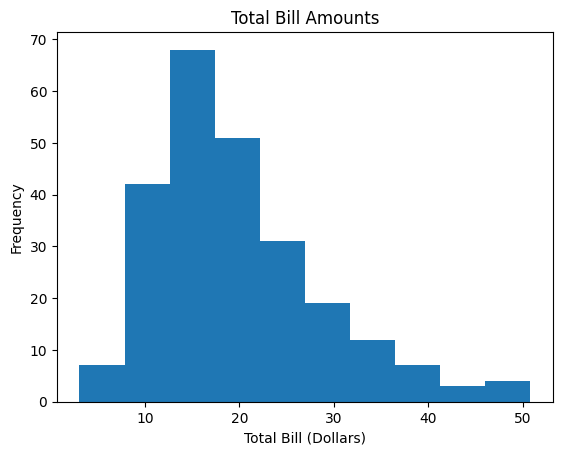

In [52]:
plt.hist(df['total_bill'])

plt.title("Total Bill Amounts")
plt.xlabel("Total Bill (Dollars)")
plt.ylabel("Frequency")
plt.show()

**Question 9**:
Create a scatter plot to visualize the relationship between the `total_bill` and `tip`.

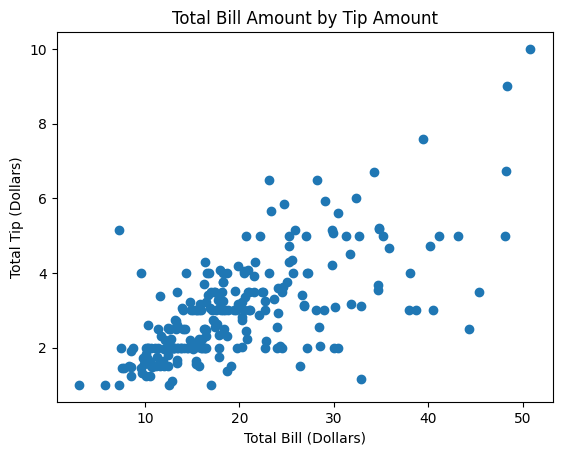

In [55]:
plt.scatter(df['total_bill'], df['tip'])

plt.title("Total Bill Amount by Tip Amount")
plt.xlabel("Total Bill (Dollars)")
plt.ylabel("Total Tip (Dollars)")
plt.show()

**Question 10**:
Using a bar plot, visualize the average tip amount for each day of the week.

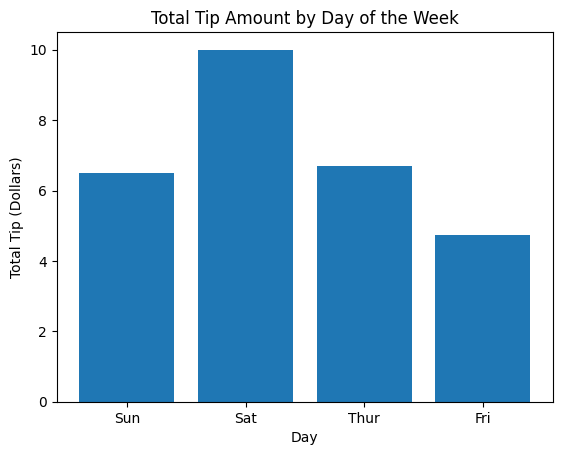

In [56]:
plt.bar(df['day'], df['tip'])

plt.title("Total Tip Amount by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Total Tip (Dollars)")
plt.show()

**Question 11**:Create a pie chart to show the distribution of 'size' values.

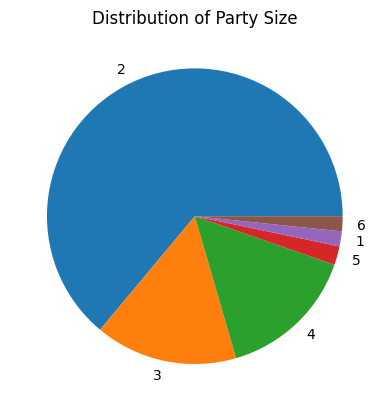

In [63]:
dayLabels = ["2", "3", "4", "5", "1", "6"]
plt.pie(df['size'].value_counts(), labels = dayLabels)

plt.title("Distribution of Party Size")
plt.show()

**Question 12**:Create a bar chart to compare average 'total_bill' amounts for 'Lunch' and 'Dinner' times.

<Axes: xlabel='time'>

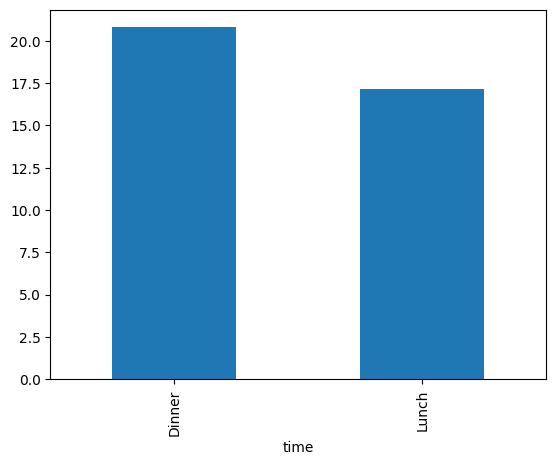

In [82]:
avg_bill = df.groupby('time')['total_bill'].agg('mean')
avg_bill.plot.bar()

### Section 3: NumPy
15 points

**Question 13:** Create a 100x100 array with random values and find the minimum and maximum values.

In [76]:
randomArray = np.random.randint(10000, size = (100, 100))

print("The smallest value in the random array is", randomArray.min(), "and the largest value is", randomArray.max())

The smallest value in the random array is 1 and the largest value is 9998


**Question 14:** Add the following two NumPy arrays.<br>
a1 = numpy.array([[5, 6, 9], [21 ,18, 27]])<br>
a2 = numpy.array([[15 ,33, 24], [4 ,7, 1]])

In [77]:
a1 = np.array([[5, 6, 9], [21 ,18, 27]])
a2 = np.array([[15 ,33, 24], [4 ,7, 1]])

np.add(a1, a2)

array([[20, 39, 33],
       [25, 25, 28]])

**Question 15:**Multiply the following 5x3 matrix by a 3x2 matrix.<br>
A = np.array([[8, 5, 7],
              [3, 15, 11],
              [10, 4, 19],
              [67, 11, 42],
              [4, 17, 13]])
              <br>
B = np.array([[2, 1],
              [1, 3],
              [4, 2]])

In [79]:
A = np.array([[8, 5, 7], [3, 15, 11], [10, 4, 19], [67, 11, 42], [4, 17, 13]])
B = np.array([[2, 1], [1, 3], [4, 2]])

np.matmul(A, B)

array([[ 49,  37],
       [ 65,  70],
       [100,  60],
       [313, 184],
       [ 77,  81]])